In [34]:
import pandas as pd


In [35]:
df = pd.read_csv('2330.csv')
df['date'] = pd.to_datetime(df['date'])
df.head(10)

,date,open,high,low,close,adjclose,volume
0,2016-03-11,154.5,155.0,153.0,155.0,129.13,29566000.0
1,2016-03-14,156.5,157.5,155.5,156.0,129.97,32751000.0
2,2016-03-15,155.0,156.5,153.0,154.5,128.72,28689000.0
3,2016-03-16,155.5,156.0,154.0,156.0,129.97,30962000.0
4,2016-03-17,159.5,160.0,157.5,158.5,132.05,48193000.0
5,2016-03-18,158.5,159.5,158.5,159.5,132.88,55975000.0
6,2016-03-21,160.0,160.0,158.0,160.0,133.30,26100000.0
7,2016-03-22,159.5,159.5,157.0,158.5,132.05,25809000.0
8,2016-03-23,158.5,159.5,158.0,159.5,132.88,27478000.0
9,2016-03-24,158.0,159.0,157.0,158.5,132.05,24853000.0


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      1190 non-null   datetime64[ns]
 1   open      1186 non-null   float64       
 2   high      1186 non-null   float64       
 3   low       1186 non-null   float64       
 4   close     1186 non-null   float64       
 5   adjclose  1186 non-null   float64       
 6   volume    1186 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 65.2 KB


In [37]:
sma_short = pd.DataFrame()
sma_short['date'] = df['date']
sma_short['adjclose'] = df['adjclose'].rolling(window=5).mean()
sma_short.loc[15:30]

,date,adjclose
15,2016-04-01,133.302
16,2016-04-06,132.384
17,2016-04-07,131.634
18,2016-04-08,130.968
19,2016-04-11,130.384
20,2016-04-12,130.384
21,2016-04-13,131.718
22,2016-04-14,132.884
23,2016-04-15,133.216
24,2016-04-18,133.132


In [38]:
sma_long['adjclose'].tail()

1185    484.333485
1186    486.502576
1187    488.626970
1188    490.858030
1189    492.877121
Name: adjclose, dtype: float64

In [39]:
sma_long = pd.DataFrame()
sma_long['date'] = df['date']
sma_long['adjclose'] = df['adjclose'].rolling(window=22).mean()
sma_long.loc[60:180]

,date,adjclose
60,2016-06-07,NaN
61,2016-06-08,NaN
62,2016-06-13,NaN
63,2016-06-14,NaN
64,2016-06-15,NaN
...,...,...
176,2016-11-22,160.604545
177,2016-11-23,160.387727
178,2016-11-24,159.994091
179,2016-11-25,159.620000


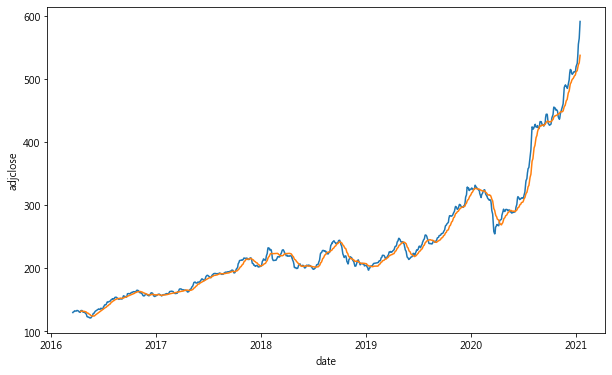

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.lineplot(x='date', y='adjclose', data=sma_short)
sns.lineplot(x='date', y='adjclose', data=sma_long)


In [41]:
import numpy as np

def buy_sell(df):
    signal_buy = []  # 買點價格
    signal_sell = [] # 賣點價格
    
    flag=-1          # 買賣點旗標，短期超過長期為1，反之為0
    
    # 掃描每一筆資料
    for index, row in df.iterrows():
        # 短期超過長期
        if row[df.columns[1]] > row[df.columns[2]]:
            if flag!=1: # 之前的短期未超過長期，即黃金交叉
                signal_buy.append(row[df.columns[3]])
                signal_sell.append(np.nan)
                flag=1
            else:
                signal_buy.append(np.nan)
                signal_sell.append(np.nan)
        elif row[df.columns[1]] < row[df.columns[2]]:
            if flag!=0: # 之前的長期未超過短期，即死亡交叉
                signal_buy.append(np.nan)
                signal_sell.append(row[df.columns[3]])
                flag=0
            else:
                signal_buy.append(np.nan)
                signal_sell.append(np.nan)
        else:
            signal_buy.append(np.nan)
            signal_sell.append(np.nan)
    return (signal_buy, signal_sell)

In [42]:
df_new = sma_short.copy()
df_new = df_new.rename({'adjclose':'sma_short'}, axis=1)
df_new.insert(2, 'sma_long', sma_long['adjclose'])
df_new.insert(3, 'adjclose', df['adjclose'])
df_new.head()

,date,sma_short,sma_long,adjclose
0,2016-03-11,NaN,NaN,129.13
1,2016-03-14,NaN,NaN,129.97
2,2016-03-15,NaN,NaN,128.72
3,2016-03-16,NaN,NaN,129.97
4,2016-03-17,129.968,NaN,132.05


In [43]:
signal_buy, signal_sell = buy_sell(df_new)
# 買點
df_buy = pd.DataFrame({'date': df['date'], 'signal_buy':signal_buy})
df_buy = df_buy[~np.isnan(signal_buy)]
df_buy

,date,signal_buy
21,2016-04-13,134.55
50,2016-05-25,128.72
124,2016-09-07,160.17
189,2016-12-09,161.04
208,2017-01-06,159.31
220,2017-01-24,160.60
278,2017-04-27,167.10
329,2017-07-11,189.67
361,2017-08-24,194.14
390,2017-10-05,200.85


In [44]:
# 賣點
df_sell = pd.DataFrame({'date': df['date'], 'signal_sell':signal_sell})
df_sell = df_sell[~np.isnan(signal_sell)]
df_sell

,date,signal_sell
26,2016-04-20,128.30
112,2016-08-22,149.35
162,2016-11-02,161.04
198,2016-12-22,154.98
215,2017-01-17,156.71
268,2017-04-13,165.80
328,2017-07-10,184.30
353,2017-08-14,188.77
385,2017-09-27,192.35
418,2017-11-16,212.93


In [45]:
# 合併短期與長期移動平均線
df_new = sma_short.copy()
df_new = df_new.rename({'adjclose':'sma_short'}, axis=1)
df_new.insert(2, 'sma_long', sma_long['adjclose'])
df_new.insert(3, 'adjclose', df['adjclose'])
df_new.head()

,date,sma_short,sma_long,adjclose
0,2016-03-11,NaN,NaN,129.13
1,2016-03-14,NaN,NaN,129.97
2,2016-03-15,NaN,NaN,128.72
3,2016-03-16,NaN,NaN,129.97
4,2016-03-17,129.968,NaN,132.05


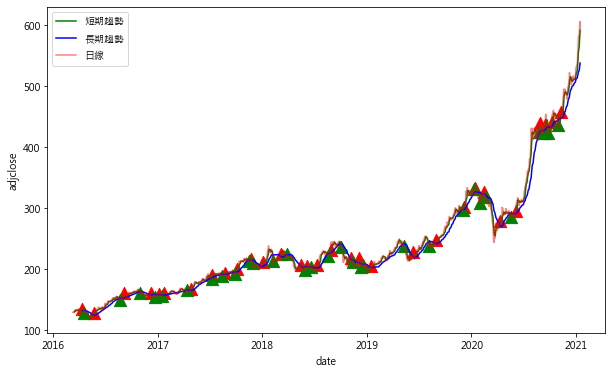

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.lineplot(x='date', y='adjclose', data=sma_short, color='g', label='短期趨勢')
sns.lineplot(x='date', y='adjclose', data=sma_long, color='b', label='長期趨勢')

plt.plot(df['date'], df['adjclose'], color='r', alpha=0.5, label='日線')
plt.scatter(df['date'], signal_buy, c='r', marker='^', s=150)
plt.scatter(df['date'], signal_sell, c='g', marker='^', s=150)

plt.legend()

In [47]:
# 計算損益(profit/loss)
def calc_profit(df_buy, df_sell, df):
    df_profit = df_buy.merge(df_sell, on='date', how='outer') 
    df_profit.sort_values(by='date', inplace=True)

    df_date = df.set_index('date')

    balance=0
    profit=0
    cost=0
    for index, row in df_profit.iterrows():
        if not row['signal_buy'] is None:
            balance+=1
            cost+=df_date.loc[row['date'], 'adjclose']
        elif not row['signal_sell'] is None:
            if balance>0:
                avg_cost = cost / balance
                profit += df_date.loc[row['date'], 'adjclose'] - avg_cost
                cost -= avg_cost
            else:
                profit += df_date.loc[row['date'], 'adjclose']

            balance-=1

    if balance>0:
        profit += df_date.loc[row['date'], 'adjclose'] * balance - cost
    elif balance<0:
        profit += df_date.loc[row['date'], 'adjclose'] * balance
    
    return profit
    
calc_profit(df_buy, df_sell, df)    

13422.179999999997